### Content
The healthcare sector has long been an early adopter of and benefited greatly from technological advances. These days, machine learning plays a key role in many health-related realms, including the development of new medical procedures, the handling of patient data, health camps and records, and the treatment of chronic diseases.

MedCamp organizes health camps in several cities with low work life balance. They reach out to working people and ask them to register for these health camps. For those who attend, MedCamp provides them facility to undergo health checks or increase awareness by visiting various stalls (depending on the format of camp).

MedCamp has conducted 65 such events over a period of 4 years and they see a high drop off between “Registration” and number of people taking tests at the Camps. In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.

### The Process:

MedCamp employees / volunteers reach out to people and drive registrations.
During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health camp.

### Other things to note:

Since this is a completely voluntary activity for the working professionals, MedCamp usually has little profile information about these people.
For a few camps, there was hardware failure, so some information about date and time of registration is lost.
MedCamp runs 3 formats of these camps. The first and second format provides people with an instantaneous health score. The third format provides   
information about several health issues through various awareness stalls.

### Favorable outcome:

For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.
You need to predict the chances (probability) of having a favourable outcome.

### Train / Test split:

Camps started on or before 31st March 2006 are considered in Train
Test data is for all camps conducted on or after 1st April 2006.
Acknowledgements
Credits to AV

### Inspiration
To share with the data science community to jump start their journey in Healthcare Analytics

Code source: 
https://www.kaggle.com/datasets/abisheksudarshan/health-care-analytics

# Loading Libraries

In [244]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from sklearn import metrics

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

# Importing the Data

In [245]:
# Set the path to the dataset files
dataset_path = r'C:\Users\godso\Documents\Datasets\Personal Project - Healthcare Analyst'

# Load the CSV files
train_df = pd.read_csv(dataset_path + '/Train.csv')
test_df = pd.read_csv(dataset_path + '/Test.csv')
patient_profile_df = pd.read_csv(dataset_path + '/Patient_Profile.csv')
health_camp_detail_df = pd.read_csv(dataset_path + '/Health_Camp_Detail.csv')
first_health_camp_attended_df = pd.read_csv(dataset_path + '/First_Health_Camp_Attended.csv')
second_health_camp_attended_df = pd.read_csv(dataset_path + '/Second_Health_Camp_Attended.csv')
third_health_camp_attended_df = pd.read_csv(dataset_path + '/Third_Health_Camp_Attended.csv')


In [246]:
# Explore the dataset
print("Train dataset:")
print(train_df.head)
print("\nTest dataset:")
print(test_df.head)
print("\nPatient Profile dataset:")
print(patient_profile_df.head)
print("\nHealth Camp Detail dataset:")
print(health_camp_detail_df.head)
print("\nFirst Health Camp Attended dataset:")
print(first_health_camp_attended_df.head)
print("\nSecond Health Camp Attended dataset:")
print(second_health_camp_attended_df.head)
print("\nThird Health Camp Attended dataset:")
print(third_health_camp_attended_df.head)


Train dataset:
<bound method NDFrame.head of        Patient_ID  Health_Camp_ID Registration_Date  Var1  Var2  Var3  Var4  \
0          489652            6578         10-Sep-05     4     0     0     0   
1          507246            6578         18-Aug-05    45     5     0     0   
2          523729            6534         29-Apr-06     0     0     0     0   
3          524931            6535         07-Feb-04     0     0     0     0   
4          521364            6529         28-Feb-06    15     1     0     0   
...           ...             ...               ...   ...   ...   ...   ...   
75273      500969            6539         03-Jan-05     0     0     0     0   
75274      511952            6528         13-Feb-06     0     0     0     0   
75275      521236            6554         24-May-05     0     0     0     0   
75276      518817            6580         22-Dec-04     0     0     0     0   
75277      511284            6555         08-Aug-05     0     0     0     0   

      

In [247]:
# Display the number of rows in each DataFrame
print("Train dataset - Rows:", train_df.shape[0])
print("Test dataset - Rows:", test_df.shape[0])
print("Patient Profile dataset - Rows:", patient_profile_df.shape[0])
print("Health Camp Detail dataset - Rows:", health_camp_detail_df.shape[0])
print("First Health Camp Attended dataset - Rows:", first_health_camp_attended_df.shape[0])
print("Second Health Camp Attended dataset - Rows:", second_health_camp_attended_df.shape[0])
print("Third Health Camp Attended dataset - Rows:", third_health_camp_attended_df.shape[0])

Train dataset - Rows: 75278
Test dataset - Rows: 35249
Patient Profile dataset - Rows: 37633
Health Camp Detail dataset - Rows: 65
First Health Camp Attended dataset - Rows: 6218
Second Health Camp Attended dataset - Rows: 7819
Third Health Camp Attended dataset - Rows: 6515


In [248]:
# Display the data types of each column
print("Train dataset - Data Types:")
print(train_df.dtypes)
print("\nTest dataset - Data Types:")
print(test_df.dtypes)
print("\nPatient Profile dataset - Data Types:")
print(patient_profile_df.dtypes)
print("\nHealth Camp Detail dataset - Data Types:")
print(health_camp_detail_df.dtypes)
print("\nFirst Health Camp Attended dataset - Data Types:")
print(first_health_camp_attended_df.dtypes)
print("\nSecond Health Camp Attended dataset - Data Types:")
print(second_health_camp_attended_df.dtypes)
print("\nThird Health Camp Attended dataset - Data Types:")
print(third_health_camp_attended_df.dtypes)

Train dataset - Data Types:
Patient_ID            int64
Health_Camp_ID        int64
Registration_Date    object
Var1                  int64
Var2                  int64
Var3                  int64
Var4                  int64
Var5                  int64
dtype: object

Test dataset - Data Types:
Patient_ID            int64
Health_Camp_ID        int64
Registration_Date    object
Var1                  int64
Var2                  int64
Var3                  int64
Var4                  int64
Var5                  int64
dtype: object

Patient Profile dataset - Data Types:
Patient_ID            int64
Online_Follower       int64
LinkedIn_Shared       int64
Twitter_Shared        int64
Facebook_Shared       int64
Income               object
Education_Score      object
Age                  object
First_Interaction    object
City_Type            object
Employer_Category    object
dtype: object

Health Camp Detail dataset - Data Types:
Health_Camp_ID      int64
Camp_Start_Date    object
Camp_End_Date

# Processing the Data

Trim spaces in beginning or end of each value.

In [249]:
# Trim spaces in Train dataset
train_df = train_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Trim spaces in Test dataset
test_df = test_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Trim spaces in Patient Profile dataset
patient_profile_df = patient_profile_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Trim spaces in Health Camp Detail dataset
health_camp_detail_df = health_camp_detail_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Trim spaces in First Health Camp Attended dataset
first_health_camp_attended_df = first_health_camp_attended_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Trim spaces in Second Health Camp Attended dataset
second_health_camp_attended_df = second_health_camp_attended_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Trim spaces in Third Health Camp Attended dataset
third_health_camp_attended_df = third_health_camp_attended_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


Checking for null values

In [250]:
# Checking missing values in Train dataset
print("Train dataset:")
print(train_df.isnull().sum())

# Checking missing values in Test dataset
print("\nTest dataset:")
print(test_df.isnull().sum())

# Checking missing values in Patient Profile dataset
print("\nPatient Profile dataset:")
print(patient_profile_df.isnull().sum())

# Checking missing values in Health Camp Detail dataset
print("\nHealth Camp Detail dataset:")
print(health_camp_detail_df.isnull().sum())

# Checking missing values in First Health Camp Attended dataset
print("\nFirst Health Camp Attended dataset:")
print(first_health_camp_attended_df.isnull().sum())

# Checking missing values in Second Health Camp Attended dataset
print("\nSecond Health Camp Attended dataset:")
print(second_health_camp_attended_df.isnull().sum())

# Checking missing values in Third Health Camp Attended dataset
print("\nThird Health Camp Attended dataset:")
print(third_health_camp_attended_df.isnull().sum())


Train dataset:
Patient_ID             0
Health_Camp_ID         0
Registration_Date    334
Var1                   0
Var2                   0
Var3                   0
Var4                   0
Var5                   0
dtype: int64

Test dataset:
Patient_ID           0
Health_Camp_ID       0
Registration_Date    0
Var1                 0
Var2                 0
Var3                 0
Var4                 0
Var5                 0
dtype: int64

Patient Profile dataset:
Patient_ID               0
Online_Follower          0
LinkedIn_Shared          0
Twitter_Shared           0
Facebook_Shared          0
Income                   0
Education_Score          0
Age                      0
First_Interaction        0
City_Type            23384
Employer_Category    34793
dtype: int64

Health Camp Detail dataset:
Health_Camp_ID     0
Camp_Start_Date    0
Camp_End_Date      0
Category1          0
Category2          0
Category3          0
dtype: int64

First Health Camp Attended dataset:
Patient_ID         

## Train dataset cleaning

In [251]:
for column in train_df.columns:
    print(train_df[column].value_counts())

516956    32
513633    28
490196    28
509188    28
517006    25
          ..
503018     1
505856     1
488973     1
494183     1
504873     1
Name: Patient_ID, Length: 29828, dtype: int64
6543    6543
6527    4144
6538    3954
6537    3859
6529    3823
6526    3809
6534    3597
6570    3564
6580    3517
6578    2837
6586    2624
6542    2368
6562    2338
6554    2303
6571    2086
6523    2084
6536    2037
6532    1993
6539    1992
6535    1882
6549    1835
6528    1744
6555    1738
6541    1547
6581    1485
6540    1426
6585    1398
6564     514
6546     403
6530     259
6561     200
6569     177
6563     171
6524     149
6544     128
6560     123
6531     120
6553      94
6575      90
6552      82
6587      79
6565      66
6557      52
6558      44
Name: Health_Camp_ID, dtype: int64
28-Mar-06    868
08-May-05    554
31-Mar-06    520
05-Jan-05    497
24-Dec-04    476
            ... 
09-Apr-04      2
17-Apr-04      2
25-Oct-03      1
29-Apr-04      1
08-Apr-04      1
Name: Registratio

It looks like Registration_date is in Train dataset and Test dataset, so maybe we can check to see if there are identical lines that have missing Registration_date values in Train dataset, maybe we can use their corresponding entries in the Test dataset to fill in those null values. 


In [252]:
# Change datatype of Registration_Date to date in Training dataset
train_df['Registration_Date'] = pd.to_datetime(train_df['Registration_Date'])

# Change datatype of Registration_Date to date in Test dataset
test_df['Registration_Date'] = pd.to_datetime(test_df['Registration_Date'])

# Check the datatypes of the Train and Test datasets
print("Train dataset - Data Types:")
print(train_df.dtypes)
print("\nTest dataset - Data Types:")
print(test_df.dtypes)

Train dataset - Data Types:
Patient_ID                    int64
Health_Camp_ID                int64
Registration_Date    datetime64[ns]
Var1                          int64
Var2                          int64
Var3                          int64
Var4                          int64
Var5                          int64
dtype: object

Test dataset - Data Types:
Patient_ID                    int64
Health_Camp_ID                int64
Registration_Date    datetime64[ns]
Var1                          int64
Var2                          int64
Var3                          int64
Var4                          int64
Var5                          int64
dtype: object


In [253]:
# Identify rows in Train dataset with missing Registration_Date
train_missing_registration = train_df[train_df['Registration_Date'].isnull()]

# Filter corresponding rows in Test dataset
test_matching_rows = test_df[test_df[['Patient_ID', 'Health_Camp_ID']].isin(train_missing_registration[['Patient_ID', 'Health_Camp_ID']])]

# Fill missing Registration_Date values in Train dataset using corresponding values from Test dataset
train_df.loc[train_missing_registration.index, 'Registration_Date'] = test_matching_rows['Registration_Date']


It didn't help. The missing values are still there. Since it's a small portion fo the dataset, I will just drop the rows. 

In [254]:
# Drop rows with missing values in the Train dataset
train_df = train_df.dropna(subset=['Registration_Date'])

# Verifying dropped values in Train dataset
print("Train dataset:")
print(train_df.isnull().sum())

Train dataset:
Patient_ID           0
Health_Camp_ID       0
Registration_Date    0
Var1                 0
Var2                 0
Var3                 0
Var4                 0
Var5                 0
dtype: int64


## Patient Profile dataset cleaning

Checking the value count on each column

In [255]:
for column in patient_profile_df:
    print(patient_profile_df[column].value_counts())

516956    1
494747    1
518611    1
517053    1
505575    1
         ..
510888    1
516747    1
507272    1
488491    1
498051    1
Name: Patient_ID, Length: 37633, dtype: int64
0    36785
1      848
Name: Online_Follower, dtype: int64
0    36614
1     1019
Name: LinkedIn_Shared, dtype: int64
0    36820
1      813
Name: Twitter_Shared, dtype: int64
0    36747
1      886
Name: Facebook_Shared, dtype: int64
None    33271
0        2033
1        1013
2         685
3         362
4         156
5          70
6          43
Name: Income, dtype: int64
None           36249
75                57
82                57
79                52
76                51
               ...  
82.16666667        1
80.775             1
65.83333333        1
84.735             1
54                 1
Name: Education_Score, Length: 228, dtype: int64
None    32618
41        361
43        359
42        336
40        321
39        299
44        293
45        240
38        219
72        218
46        214
73        199
47  

Change the data type of Registration_Date.

In [256]:
patient_profile_df['First_Interaction'] = pd.to_datetime(patient_profile_df['First_Interaction'])

Cleaning up the Patient Profile dataset

In [257]:
# Unique values for the "City_Type" column
unique_city_types = patient_profile_df['City_Type'].unique()
print(unique_city_types)
# Unique values for the "Employer_Category" column
unique_employer_categories = patient_profile_df['Employer_Category'].unique()
print(unique_employer_categories)


[nan 'H' 'D' 'F' 'G' 'B' 'E' 'I' 'A' 'C']
['Software Industry' 'BFSI' 'Education' 'Others' nan 'Technology'
 'Consulting' 'Manufacturing' 'Health' 'Retail' 'Transport' 'Broadcasting'
 'Food' 'Telecom' 'Real Estate']


In [258]:
patient_profile_df['Facebook_Shared'].value_counts()

0    36747
1      886
Name: Facebook_Shared, dtype: int64

I'm not seeing the relevance of the social media shared columns to the questions we want to ask. 

Replace the null values in the "City_Type" column with "undefined":

In [259]:
patient_profile_df['City_Type'] = patient_profile_df['City_Type'].fillna('undefined')

Replace the null values in the "Employer_Category" column with "undefined"

In [260]:
patient_profile_df['Employer_Category'] = patient_profile_df['Employer_Category'].fillna('undefined')

Change First_Interaction to datetime format

In [261]:
# Convert 'First_Interaction' column to datetime
patient_profile_df['First_Interaction'] = pd.to_datetime(patient_profile_df['First_Interaction'], format='%d-%b-%y')

## Health Camp Detail Dataset

In [262]:
for column in health_camp_detail_df:
    print(health_camp_detail_df[column].value_counts())

6560    1
6587    1
6555    1
6543    1
6537    1
       ..
6523    1
6524    1
6527    1
6554    1
6577    1
Name: Health_Camp_ID, Length: 65, dtype: int64
16-Aug-03    2
09-Jan-04    2
09-Nov-06    2
22-Sep-06    2
27-Sep-05    2
19-Feb-05    2
30-Jan-07    2
04-Jan-04    1
13-Jun-06    1
12-Oct-05    1
17-Oct-05    1
03-Dec-05    1
10-Feb-06    1
30-Mar-06    1
02-Apr-06    1
06-Apr-06    1
08-Apr-06    1
18-Apr-06    1
12-May-06    1
05-Jul-06    1
07-Dec-03    1
02-Aug-06    1
04-Aug-06    1
17-Aug-06    1
19-Aug-06    1
20-Sep-06    1
30-Nov-03    1
12-Oct-06    1
22-Nov-03    1
13-Nov-06    1
11-Dec-06    1
09-Oct-05    1
15-Sep-05    1
01-Feb-04    1
09-Dec-04    1
26-Apr-04    1
29-Apr-04    1
21-May-04    1
07-Aug-04    1
22-Aug-04    1
09-Sep-04    1
17-Sep-04    1
01-Oct-04    1
01-Nov-04    1
24-Nov-04    1
22-Dec-04    1
16-Aug-05    1
03-Jan-05    1
15-Feb-05    1
17-Dec-03    1
23-Feb-05    1
13-May-05    1
13-Jun-05    1
19-Jun-05    1
23-Jun-05    1
03-Nov-03    1
02-

By the values, I'm assuming (because I cannot verify it with the data origin) that Category1 is the 3 types of Health Camps. 

In [263]:
# Change datatype of Camp_Start_Date and Camp_End_Date to date in Health Camp Detail
health_camp_detail_df[['Camp_Start_Date', 'Camp_End_Date']] = health_camp_detail_df[['Camp_Start_Date', 'Camp_End_Date']].apply(pd.to_datetime)

# Check the datatypes of the Health Camp Detail dataset
print("Health Camp Detail - Data Types:")
print(health_camp_detail_df.dtypes)


Health Camp Detail - Data Types:
Health_Camp_ID              int64
Camp_Start_Date    datetime64[ns]
Camp_End_Date      datetime64[ns]
Category1                  object
Category2                  object
Category3                   int64
dtype: object


Checking the durations of the dates

In [264]:
# Camp_Start_Date and Camp_End_Date by quarter
health_camp_detail_df['Camp_Start_Quarter'] = health_camp_detail_df['Camp_Start_Date'].dt.quarter
health_camp_detail_df['Camp_End_Quarter'] = health_camp_detail_df['Camp_End_Date'].dt.quarter

# Camp_Start_Date and Camp_End_Date by month
health_camp_detail_df['Camp_Start_Month'] = health_camp_detail_df['Camp_Start_Date'].dt.month
health_camp_detail_df['Camp_End_Month'] = health_camp_detail_df['Camp_End_Date'].dt.month

# Camp_Start_Date and Camp_End_Date by day
health_camp_detail_df['Camp_Start_Day'] = health_camp_detail_df['Camp_Start_Date'].dt.day
health_camp_detail_df['Camp_End_Day'] = health_camp_detail_df['Camp_End_Date'].dt.day

# Checking Camp Duration
health_camp_detail_df['Camp_Duration'] = (health_camp_detail_df['Camp_End_Date'] - health_camp_detail_df['Camp_Start_Date']).dt.days

# Filter the dataset by each camp type
camp_type_1 = health_camp_detail_df[health_camp_detail_df['Category1'] == 'First']
camp_type_2 = health_camp_detail_df[health_camp_detail_df['Category1'] == 'Second']
camp_type_3 = health_camp_detail_df[health_camp_detail_df['Category1'] == 'Third']

# Print the results
print("Camp Duration of Camp Type 3:")
print(camp_type_3)

Camp Duration of Camp Type 3:
    Health_Camp_ID Camp_Start_Date Camp_End_Date Category1 Category2  \
29            6527      2005-06-13    2005-07-22     Third         G   
34            6578      2005-08-16    2005-10-14     Third         G   
41            6541      2005-12-03    2006-01-30     Third         G   
42            6528      2006-02-10    2006-04-25     Third         G   
48            6574      2006-05-12    2006-08-18     Third         G   
49            6548      2006-06-13    2006-08-18     Third         G   
54            6576      2006-08-19    2007-11-07     Third         G   
58            6550      2006-10-12    2006-12-18     Third         G   
59            6573      2006-11-09    2007-03-16     Third         G   
64            6577      2007-01-30    2007-03-08     Third         G   

    Category3  Camp_Start_Quarter  Camp_End_Quarter  Camp_Start_Month  \
29          2                   2                 3                 6   
34          2                  

In [265]:
# Check the datatypes of the Health Camp Detail dataset
print("Health Camp Detail - Data Types:")
print(health_camp_detail_df.dtypes)

Health Camp Detail - Data Types:
Health_Camp_ID                 int64
Camp_Start_Date       datetime64[ns]
Camp_End_Date         datetime64[ns]
Category1                     object
Category2                     object
Category3                      int64
Camp_Start_Quarter             int64
Camp_End_Quarter               int64
Camp_Start_Month               int64
Camp_End_Month                 int64
Camp_Start_Day                 int64
Camp_End_Day                   int64
Camp_Duration                  int64
dtype: object


## First Health Camp Attended dataset cleaning

In [266]:
for column in first_health_camp_attended_df:
    print(first_health_camp_attended_df[column].value_counts())

509188    18
486932    17
500120    13
498743    12
515879    12
          ..
498158     1
511988     1
493733     1
490253     1
508766     1
Name: Patient_ID, Length: 3548, dtype: int64
6543    826
6538    625
6586    600
6537    481
6542    362
6554    346
6570    276
6532    262
6580    260
6539    254
6535    252
6585    203
6571    195
6540    140
6526    140
6563    117
6569    112
6581     89
6562     89
6531     79
6561     55
6524     54
6575     51
6564     49
6552     43
6530     42
6565     41
6560     41
6587     36
6557     36
6558     20
6546     18
6544     13
6553     11
Name: Health_Camp_ID, dtype: int64
20     1609
10     1316
30     1250
40      760
50      473
60      283
70      194
80       91
90       74
100      51
110      30
120      24
130      18
140      13
160       8
150       8
170       6
250       2
210       2
180       2
190       1
220       1
280       1
330       1
Name: Donation, dtype: int64
0.360339    111
0.464856    102
0.559855    101
0.75

'Unnamed: 4' seems to not have a single value in it.

In [267]:
# Drop the "Unnamed: 4" column from the dataset
first_health_camp_attended_df = first_health_camp_attended_df.drop("Unnamed: 4", axis=1)

# Checking missing values in First Health Camp Attended dataset
print("\nFirst Health Camp Attended dataset:")
print(first_health_camp_attended_df.isnull().sum())


First Health Camp Attended dataset:
Patient_ID        0
Health_Camp_ID    0
Donation          0
Health_Score      0
dtype: int64


In [268]:
# Checking Dropped Column
first_health_camp_attended_df.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score
0,506181,6560,40,0.439024
1,494977,6560,20,0.097561
2,518680,6560,10,0.048780
3,509916,6560,30,0.634146
4,488006,6560,20,0.024390


## Second Health Camp Attended dataset cleaning

In [269]:
second_health_camp_attended_df.head()

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712


Renaming Health Score to Health_Score

In [270]:
# Rename the column
second_health_camp_attended_df = second_health_camp_attended_df.rename(columns={'Health Score': 'Health_Score'})

# Verify the updated column name
print(second_health_camp_attended_df.head)


<bound method NDFrame.head of       Patient_ID  Health_Camp_ID  Health_Score
0         526631            6536      0.875136
1         509122            6536      0.755700
2         498864            6536      0.673181
3         515398            6536      0.722041
4         504624            6536      0.464712
...          ...             ...           ...
7814      490853            6529      0.103136
7815      499836            6529      0.507841
7816      511286            6529      0.627865
7817      522935            6529      0.252714
7818      489487            6529      0.691194

[7819 rows x 3 columns]>


# Analyze the Data

## Exploratory Data Analysis

Here are 4 questions I think we can ask of the data based on the context: 
1. What is the average duration of different camp types (Category1) and how does it impact participant attendance and engagement?
2. What is the drop-off rate between the "Registration" stage and the number of people actually participating in the medical camps?
3. Can we identify any patterns or factors that contribute to the drop-off in participation?
4. Can we predict the likelihood of a participant having a favorable outcome (e.g., obtaining a health score or visiting at least one stall) based on the available data?

### Looking at question 1:
1. What is the average duration of different camp types (Category1) and how does it impact participant attendance and engagement?

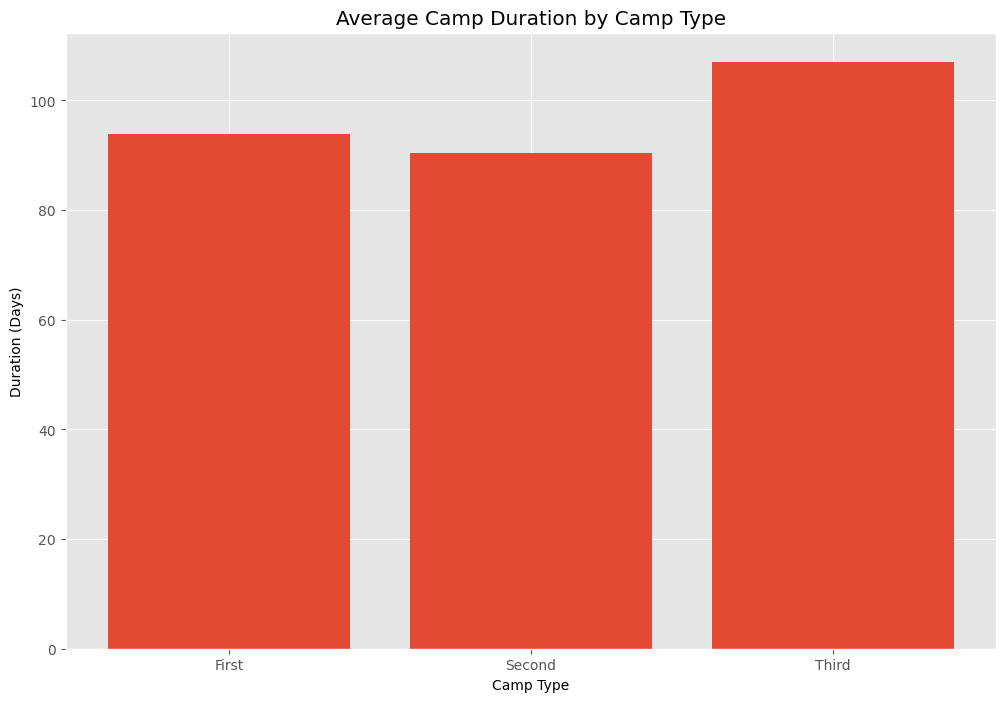

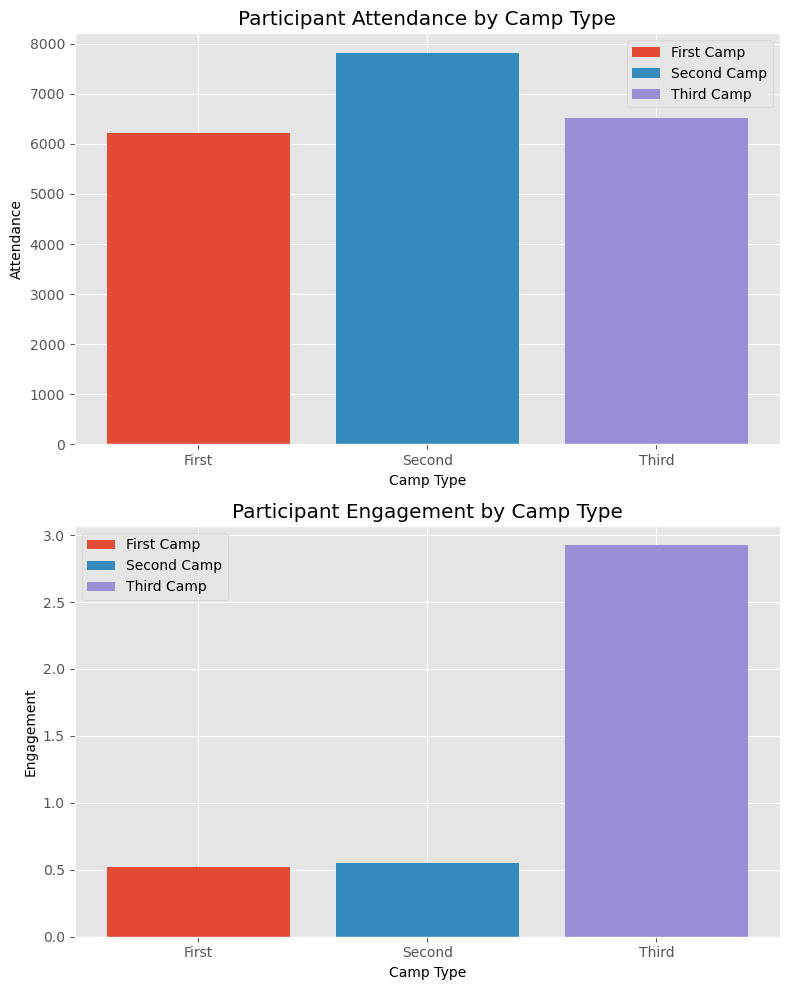

In [271]:
import matplotlib.pyplot as plt

# Merge participant attendance data with camp details
first_camp_merged = pd.merge(first_health_camp_attended_df, health_camp_detail_df, on='Health_Camp_ID')
second_camp_merged = pd.merge(second_health_camp_attended_df, health_camp_detail_df, on='Health_Camp_ID')
third_camp_merged = pd.merge(third_health_camp_attended_df, health_camp_detail_df, on='Health_Camp_ID')

# Calculate attendance by camp type
first_camp_attendance = first_camp_merged.groupby('Category1')['Patient_ID'].count()
second_camp_attendance = second_camp_merged.groupby('Category1')['Patient_ID'].count()
third_camp_attendance = third_camp_merged.groupby('Category1')['Patient_ID'].count()

# Calculate engagement by camp type
first_camp_engagement = first_camp_merged.groupby('Category1')['Health_Score'].mean()
second_camp_engagement = second_camp_merged.groupby('Category1')['Health_Score'].mean()
third_camp_engagement = third_camp_merged.groupby('Category1')['Number_of_stall_visited'].mean()

# Calculate average camp duration by camp type
camp_duration_by_type = health_camp_detail_df.groupby('Category1')['Camp_Duration'].mean()

# Plot average camp duration vs attendance
plt.bar(camp_duration_by_type.index, camp_duration_by_type.values)
plt.title('Average Camp Duration by Camp Type')
plt.xlabel('Camp Type')
plt.ylabel('Duration (Days)')
plt.show()

# Plot average camp duration vs attendance and engagement
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Attendance plot
axes[0].bar(first_camp_attendance.index, first_camp_attendance.values, label='First Camp')
axes[0].bar(second_camp_attendance.index, second_camp_attendance.values, label='Second Camp')
axes[0].bar(third_camp_attendance.index, third_camp_attendance.values, label='Third Camp')
axes[0].set_title('Participant Attendance by Camp Type')
axes[0].set_xlabel('Camp Type')
axes[0].set_ylabel('Attendance')
axes[0].legend()

# Engagement plot
axes[1].bar(first_camp_engagement.index, first_camp_engagement.values, label='First Camp')
axes[1].bar(second_camp_engagement.index, second_camp_engagement.values, label='Second Camp')
axes[1].bar(third_camp_engagement.index, third_camp_engagement.values, label='Third Camp')
axes[1].set_title('Participant Engagement by Camp Type')
axes[1].set_xlabel('Camp Type')
axes[1].set_ylabel('Engagement')
axes[1].legend()

plt.tight_layout()
plt.show()



The third camp type has a different engagement metric than the first two, but it shows the largest engagement and second highest attendance and longest average duration. 

### Looking at Question 2: 
2. What is the drop-off rate between the "Registration" stage and the number of people actually participating in the medical camps?

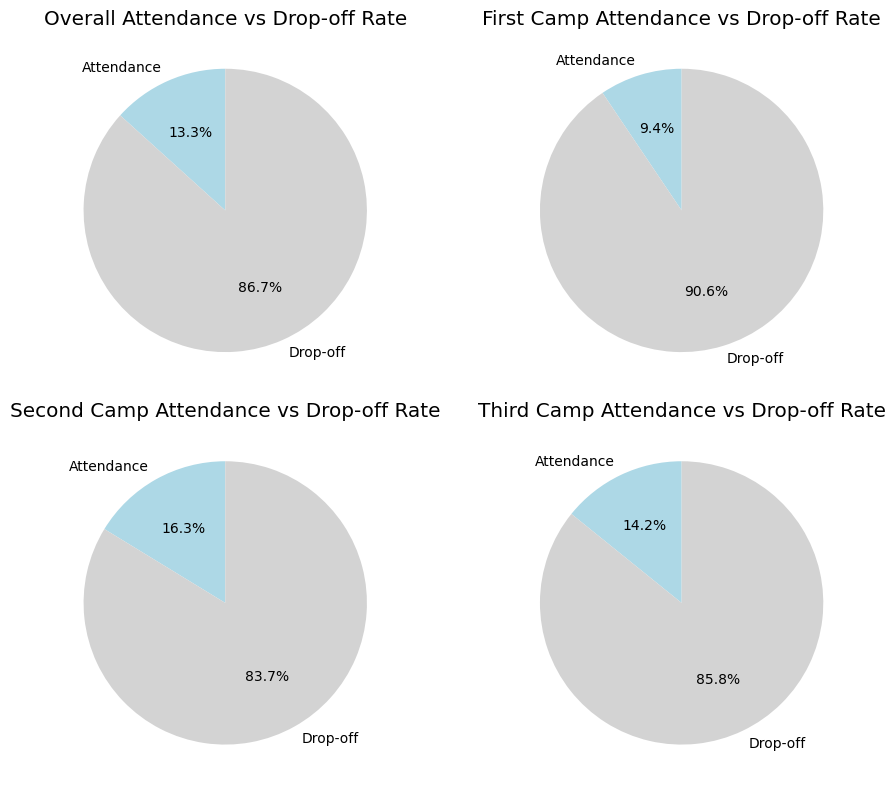

In [272]:
# Calculate the number of registrations
registration_count = len(patient_profile_df['Patient_ID'].unique())

# Calculate the number of participants in the First, Second, and Third Health Camp Attended datasets
first_attended_count = len(first_health_camp_attended_df['Patient_ID'].unique())
second_attended_count = len(second_health_camp_attended_df['Patient_ID'].unique())
third_attended_count = len(third_health_camp_attended_df['Patient_ID'].unique())

# Calculate the attendance rates for each camp
first_attendance_rate = (first_attended_count / registration_count) * 100
second_attendance_rate = (second_attended_count / registration_count) * 100
third_attendance_rate = (third_attended_count / registration_count) * 100

# Calculate the drop-off rates for each camp
first_dropoff_rate = 100 - first_attendance_rate
second_dropoff_rate = 100 - second_attendance_rate
third_dropoff_rate = 100 - third_attendance_rate

# Calculate the overall attendance and drop-off rates
overall_attendance_rate = (first_attendance_rate + second_attendance_rate + third_attendance_rate) / 3
overall_dropoff_rate = 100 - overall_attendance_rate

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Overall Attendance vs Drop-off Rate
axes[0, 0].pie([overall_attendance_rate, overall_dropoff_rate], labels=['Attendance', 'Drop-off'], colors=['lightblue', 'lightgray'], autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Overall Attendance vs Drop-off Rate')

# First Camp Attendance vs Drop-off Rate
axes[0, 1].pie([first_attendance_rate, first_dropoff_rate], labels=['Attendance', 'Drop-off'], colors=['lightblue', 'lightgray'], autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('First Camp Attendance vs Drop-off Rate')

# Second Camp Attendance vs Drop-off Rate
axes[1, 0].pie([second_attendance_rate, second_dropoff_rate], labels=['Attendance', 'Drop-off'], colors=['lightblue', 'lightgray'], autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Second Camp Attendance vs Drop-off Rate')

# Third Camp Attendance vs Drop-off Rate
axes[1, 1].pie([third_attendance_rate, third_dropoff_rate], labels=['Attendance', 'Drop-off'], colors=['lightblue', 'lightgray'], autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Third Camp Attendance vs Drop-off Rate')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the grid of plots
plt.show()



This shows how many of the patients that registered actually showed up to the Health Camps. There doesn't seem to be a large difference in attendance between the Health Camp types, but of the people who sign up an average of 13.3% of people actually attend and 86.7% drop off. 

There's no way of showing the drop off over time with the datasets avaialble to me, but some of these patients showed up multiple times. Now I want to know the average times a patient visited a Health Camp. 

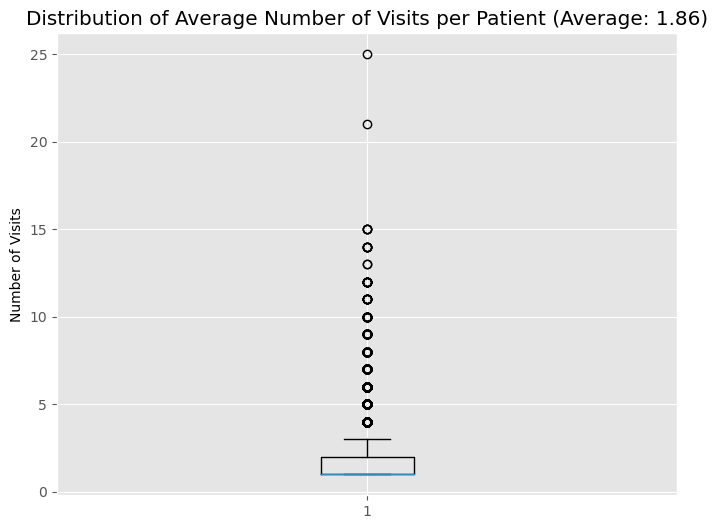

In [273]:
# Merge the three datasets
attended_df = pd.concat([first_health_camp_attended_df, second_health_camp_attended_df, third_health_camp_attended_df])

# Count the number of visits for each patient
patient_visits = attended_df.groupby('Patient_ID')['Health_Camp_ID'].nunique()

# Calculate the average number of visits per patient
average_visits = patient_visits.mean()

# Create a boxplot for the average number of visits
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(patient_visits.values)
ax.set_ylabel('Number of Visits')
ax.set_title('Distribution of Average Number of Visits per Patient (Average: {:.2f})'.format(average_visits))
plt.show()


The average patient visited the health camps 1.86 times with some outliers visiting up to 25 times. 

Create a drop off colum in the patient_profile_df in order to label the patients that didn't attend a health camp as drop-offs. This should help in the future. 

In [274]:
# Create a new column 'Attended_Camp' in patient_profile_df
patient_profile_df['Attended_Camp'] = 0

# Update the 'Attended_Camp' column with 1 for patients who attended the camps
patient_profile_df.loc[patient_profile_df['Patient_ID'].isin(first_health_camp_attended_df['Patient_ID']), 'Attended_Camp'] = 1
patient_profile_df.loc[patient_profile_df['Patient_ID'].isin(second_health_camp_attended_df['Patient_ID']), 'Attended_Camp'] = 1
patient_profile_df.loc[patient_profile_df['Patient_ID'].isin(third_health_camp_attended_df['Patient_ID']), 'Attended_Camp'] = 1


In [275]:
print(patient_profile_df.head)

<bound method NDFrame.head of        Patient_ID  Online_Follower  LinkedIn_Shared  Twitter_Shared  \
0          516956                0                0               0   
1          507733                0                0               0   
2          508307                0                0               0   
3          512612                0                0               0   
4          521075                0                0               0   
...           ...              ...              ...             ...   
37628      518600                0                0               0   
37629      509515                0                0               0   
37630      510713                0                0               0   
37631      493667                0                0               0   
37632      498051                0                0               0   

       Facebook_Shared Income Education_Score   Age First_Interaction  \
0                    0      1              9

### Looking at Question 3: 

3. Can we identify any patterns or factors that contribute to the drop-off in participation?

Combining potential columns for checking with correlation heatmaps.

In [276]:
# Start with the train DataFrame
combined_df = train_df.copy()


# Merge with health_camp_detail_df
combined_df = combined_df.merge(health_camp_detail_df[['Health_Camp_ID', 'Camp_Start_Date', 'Camp_End_Date', 'Category1', 'Category2']], on='Health_Camp_ID', how='left')


# Merge with first_health_camp_attended_df
combined_df = combined_df.merge(first_health_camp_attended_df[['Patient_ID', 'Health_Camp_ID', 'Donation', 'Health_Score']], on=['Patient_ID', 'Health_Camp_ID'], how='left')


# Merge with second_health_camp_attended_df
combined_df = combined_df.merge(second_health_camp_attended_df[['Patient_ID', 'Health_Camp_ID', 'Health_Score']], on=['Patient_ID', 'Health_Camp_ID'], how='left', suffixes=('_first', '_second'))


# Merge with third_health_camp_attended_df
combined_df = combined_df.merge(third_health_camp_attended_df[['Patient_ID', 'Health_Camp_ID', 'Number_of_stall_visited', 'Last_Stall_Visited_Number']], on=['Patient_ID', 'Health_Camp_ID'], how='left')


# Merge with patient_profile_df to add the 'Attended_Camp' column
combined_df = combined_df.merge(patient_profile_df[['Patient_ID', 'Attended_Camp', 'City_Type', 'Education_Score', 'Age', 'Employer_Category', 'Income']], on='Patient_ID', how='left')


# Select the desired columns for correlation heatmap
correlation_df = combined_df[['Camp_Start_Date', 'Camp_End_Date', 'Category1', 'Category2', 'Donation', 'City_Type', 'Education_Score', 'Age', 'Income', 'Employer_Category', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Attended_Camp']]
print('Select columns for correlation heatmap')
print(correlation_df.head)



Select columns for correlation heatmap
<bound method NDFrame.head of       Camp_Start_Date Camp_End_Date Category1 Category2  Donation  City_Type  \
0          2005-08-16    2005-10-14     Third         G       NaN  undefined   
1          2005-08-16    2005-10-14     Third         G       NaN          C   
2          2005-10-17    2007-11-07    Second         A       NaN  undefined   
3          2004-02-01    2004-02-18     First         E       NaN          I   
4          2006-03-30    2006-04-03    Second         A       NaN          I   
...               ...           ...       ...       ...       ...        ...   
74939      2004-08-07    2005-02-12     First         F       NaN  undefined   
74940      2006-02-10    2006-04-25     Third         G       NaN          I   
74941      2005-06-19    2005-07-01     First         B      20.0          G   
74942      2004-12-22    2005-01-06     First         E       NaN          E   
74943      2005-09-15    2005-09-19    Second      

Creating "dummies" for correlation_df to change columns from categorical data into numerical data for heatmapping future modeling. Also, changing data types where needed. 

In [277]:
# Creating Dummies for Income
income_dummies = pd.get_dummies(correlation_df['Income'], prefix='Income', prefix_sep='_', drop_first=True)
correlation_df = pd.concat([correlation_df.drop('Income', axis=1), income_dummies], axis=1)

# Creating Dummies for City_Type
city_type_dummies = pd.get_dummies(correlation_df['City_Type'], prefix='City', prefix_sep='_', drop_first=True)
correlation_df = pd.concat([correlation_df.drop('City_Type', axis=1), city_type_dummies], axis=1)

# Convert 'Education_Score' column to numeric
correlation_df['Education_Score'] = pd.to_numeric(correlation_df['Education_Score'], errors='coerce')

# Convert 'Age' column to numeric
correlation_df['Age'] = pd.to_numeric(correlation_df['Age'], errors='coerce')

# Create dummies for 'Employer_Category'
employer_category_dummies = pd.get_dummies(correlation_df['Employer_Category'], prefix='Employer', prefix_sep='_', drop_first=True)
correlation_df = pd.concat([correlation_df.drop('Employer_Category', axis=1), employer_category_dummies], axis=1)

# Create dummies for Category2
category2_dummies = pd.get_dummies(correlation_df['Category2'], prefix='Category2', prefix_sep='_')
correlation_df = pd.concat([correlation_df.drop('Category2', axis=1), category2_dummies], axis=1)


In [278]:
print(correlation_df.columns)

Index(['Camp_Start_Date', 'Camp_End_Date', 'Category1', 'Donation',
       'Education_Score', 'Age', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5',
       'Attended_Camp', 'Income_1', 'Income_2', 'Income_3', 'Income_4',
       'Income_5', 'Income_6', 'Income_None', 'City_B', 'City_C', 'City_D',
       'City_E', 'City_F', 'City_G', 'City_H', 'City_I', 'City_undefined',
       'Employer_Broadcasting', 'Employer_Consulting', 'Employer_Education',
       'Employer_Food', 'Employer_Health', 'Employer_Manufacturing',
       'Employer_Others', 'Employer_Real Estate', 'Employer_Retail',
       'Employer_Software Industry', 'Employer_Technology', 'Employer_Telecom',
       'Employer_Transport', 'Employer_undefined', 'Category2_A',
       'Category2_B', 'Category2_C', 'Category2_D', 'Category2_E',
       'Category2_F', 'Category2_G'],
      dtype='object')


In [279]:
print(correlation_df.head)

<bound method NDFrame.head of       Camp_Start_Date Camp_End_Date Category1  Donation  Education_Score  \
0          2005-08-16    2005-10-14     Third       NaN              NaN   
1          2005-08-16    2005-10-14     Third       NaN             75.0   
2          2005-10-17    2007-11-07    Second       NaN              NaN   
3          2004-02-01    2004-02-18     First       NaN              NaN   
4          2006-03-30    2006-04-03    Second       NaN             70.0   
...               ...           ...       ...       ...              ...   
74939      2004-08-07    2005-02-12     First       NaN              NaN   
74940      2006-02-10    2006-04-25     Third       NaN             73.0   
74941      2005-06-19    2005-07-01     First      20.0             92.0   
74942      2004-12-22    2005-01-06     First       NaN             76.0   
74943      2005-09-15    2005-09-19    Second       NaN              NaN   

        Age  Var1  Var2  Var3  Var4  ...  Employer_Teleco

Replacing nulls of Donation with 0.

In [280]:
# Fill null values in 'Donation' column with zeros
correlation_df['Donation'] = correlation_df['Donation'].fillna(0)

Generating the correlation heatmaps. 

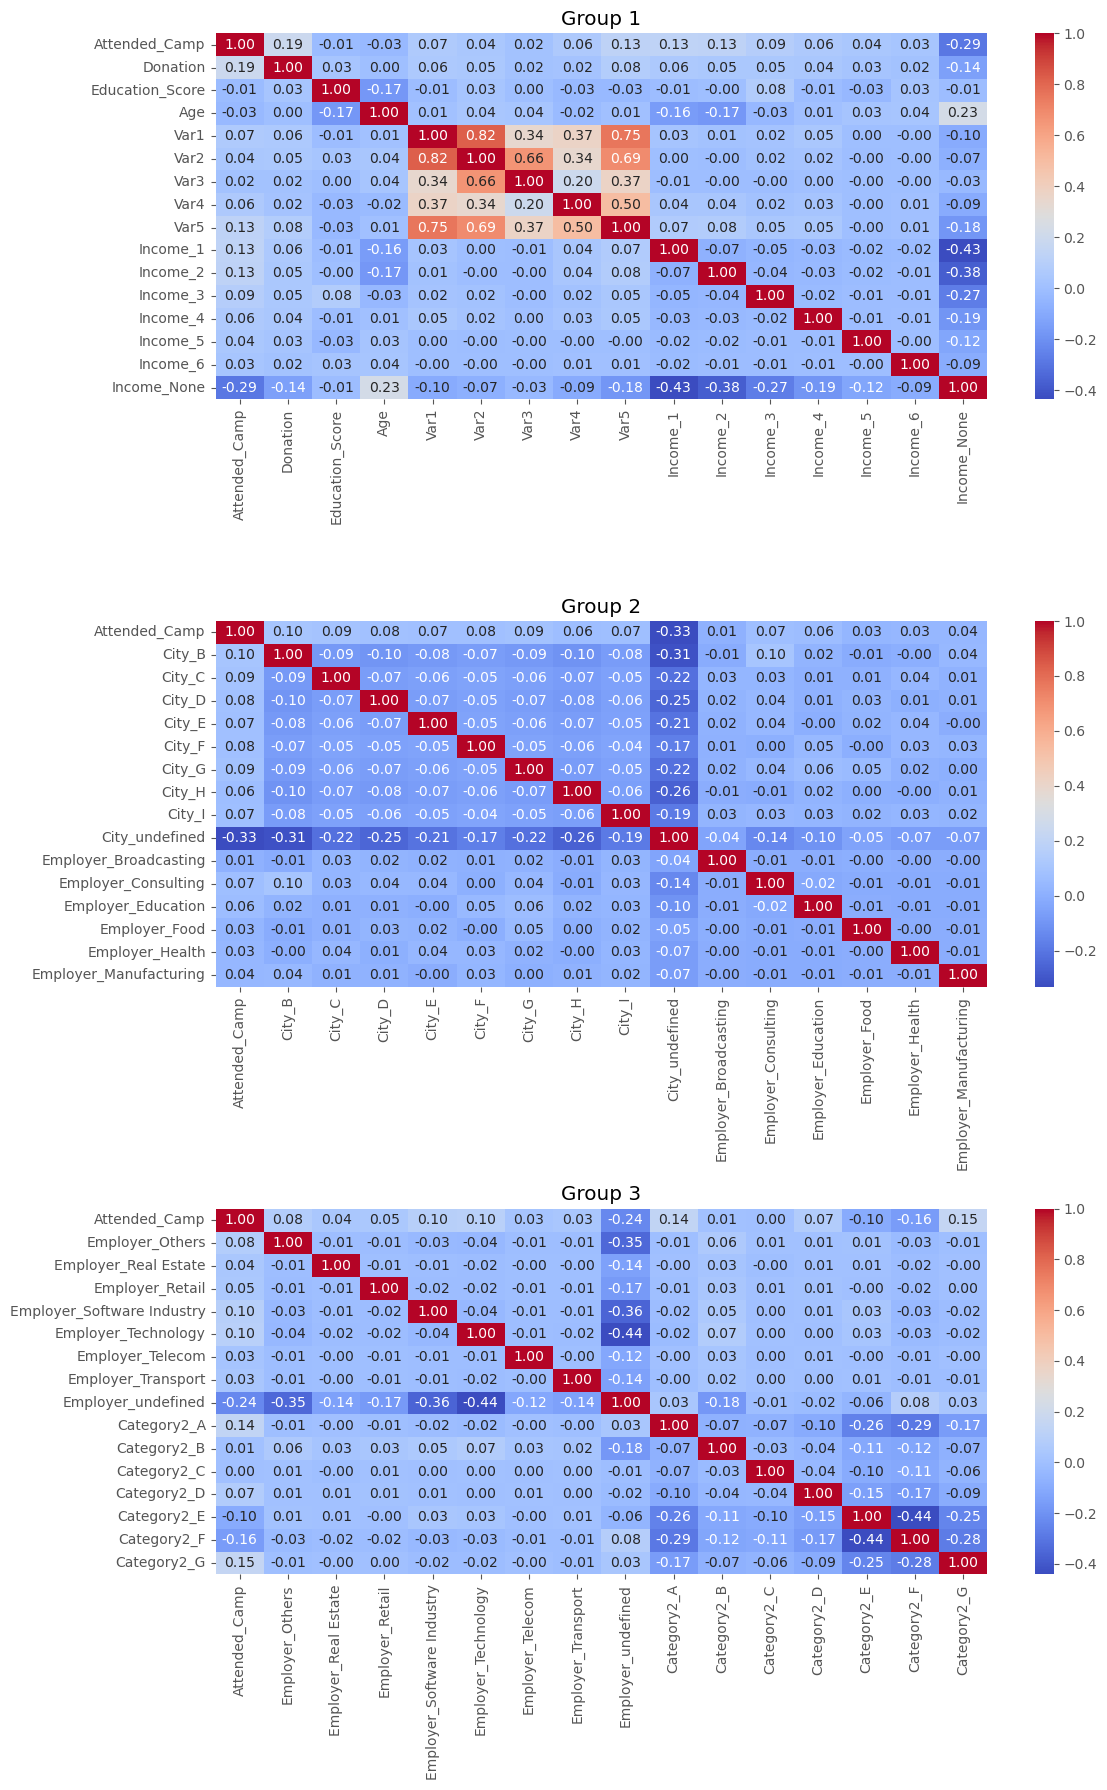

In [281]:
# Divide column names into groups
group1 = ['Attended_Camp', 'Camp_Start_Date', 'Camp_End_Date', 'Donation','Education_Score', 'Age', 'Var1', 
          'Var2', 'Var3', 'Var4', 'Var5', 'Income_1', 'Income_2', 'Income_3', 'Income_4',
          'Income_5', 'Income_6', 'Income_None']
group2 = ['Attended_Camp', 'City_B', 'City_C', 'City_D', 'City_E', 'City_F', 'City_G', 'City_H', 'City_I',
          'City_undefined', 'Employer_Broadcasting', 'Employer_Consulting',
          'Employer_Education', 'Employer_Food', 'Employer_Health', 'Employer_Manufacturing']
group3 = ['Attended_Camp', 'Employer_Others', 'Employer_Real Estate',
          'Employer_Retail', 'Employer_Software Industry', 'Employer_Technology',
          'Employer_Telecom', 'Employer_Transport', 'Employer_undefined', 'Category2_A',
          'Category2_B', 'Category2_C', 'Category2_D', 'Category2_E', 'Category2_F',
          'Category2_G']

# Create separate heatmaps for each group
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.heatmap(correlation_df[group1].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title('Group 1')

sns.heatmap(correlation_df[group2].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title('Group 2')

sns.heatmap(correlation_df[group3].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[2])
axes[2].set_title('Group 3')

plt.tight_layout()
plt.show()


Besides the columns that have undefined data, Category2 has 7 variables, and the A, F and G variables have the strongest correlation to the Attended_Camp column. Also, Income_1 and Income_2 and Var5 have stronger correlations. The meanings of those variables are anonymous to me, but I would advise looking deeper into those. 

### Looking at question 4

4. Can we predict the likelihood of a participant having a favorable outcome (e.g., obtaining a health score or visiting at least one stall) based on the available data?

We will create a column that indicates whether a patient had a "favorable outcome" or not using our combined_df dataframe. (I don't want to use the correlation_df_filled even though we may need to remake dummies in the future because I don't want all null values replaced with 0.)

In [282]:
combined_df['Favorable_Outcome'] = 0

# Assign a value of 1 if the patient has any health score or visited a stall
combined_df.loc[(combined_df['Health_Score_first'].notnull()) | (combined_df['Health_Score_second'].notnull()) | (combined_df['Number_of_stall_visited'].notnull()), 'Favorable_Outcome'] = 1


In [283]:
print('combined_df.head')
print(combined_df.head)

combined_df.head
<bound method NDFrame.head of        Patient_ID  Health_Camp_ID Registration_Date  Var1  Var2  Var3  Var4  \
0          489652            6578        2005-09-10     4     0     0     0   
1          507246            6578        2005-08-18    45     5     0     0   
2          523729            6534        2006-04-29     0     0     0     0   
3          524931            6535        2004-02-07     0     0     0     0   
4          521364            6529        2006-02-28    15     1     0     0   
...           ...             ...               ...   ...   ...   ...   ...   
74939      500969            6539        2005-01-03     0     0     0     0   
74940      511952            6528        2006-02-13     0     0     0     0   
74941      521236            6554        2005-05-24     0     0     0     0   
74942      518817            6580        2004-12-22     0     0     0     0   
74943      511284            6555        2005-08-08     0     0     0     0   

    

Comparing the Favorable_Outcome with the Attended_Camp columns

In [284]:
cross_tab = pd.crosstab(combined_df['Attended_Camp'], combined_df['Favorable_Outcome'])
print(cross_tab)

Favorable_Outcome      0      1
Attended_Camp                  
0                  29923      0
1                  24665  20356


So the main takeaway from this is that there are 32334 participants who attended the camp but didn't have a favorable outcome, and 12687 who attended the camp and did. 

### Preprocessing data, and splitting into training and testing sets. 

First we want to filter out those who didn't attend a camp and see how many null values we have left. 

In [285]:
combined_df_attended = combined_df[combined_df['Attended_Camp'] == 1].copy()
print(combined_df_attended.isnull().sum())

Patient_ID                       0
Health_Camp_ID                   0
Registration_Date                0
Var1                             0
Var2                             0
Var3                             0
Var4                             0
Var5                             0
Camp_Start_Date                  0
Camp_End_Date                    0
Category1                        0
Category2                        0
Donation                     38848
Health_Score_first           38848
Health_Score_second          37352
Number_of_stall_visited      38507
Last_Stall_Visited_Number    38507
Attended_Camp                    0
City_Type                        0
Education_Score                  0
Age                              0
Employer_Category                0
Income                           0
Favorable_Outcome                0
dtype: int64


Replacing NaN values with 0 in the donation, and number_of_stall_visited, and last_stall_visited_number columns as they would be zero if the patients didn't donate or visit. 

Health_Score_first and Health_Score_second will have their NaN values retained.

In [286]:
# Fill null values in 'Donation' column with zeros
combined_df_attended['Donation'] = combined_df_attended['Donation'].fillna(0)

# Replace missing values with 0 in 'Number_of_stall_visited' and 'Last_Stall_Visited_Number' columns of camp_3_df
combined_df_attended['Number_of_stall_visited'].fillna(0, inplace=True)
combined_df_attended['Last_Stall_Visited_Number'].fillna(0, inplace=True)

In [287]:
print('combined_df_attended')
print(combined_df_attended.head)

combined_df_attended
<bound method NDFrame.head of        Patient_ID  Health_Camp_ID Registration_Date  Var1  Var2  Var3  Var4  \
0          489652            6578        2005-09-10     4     0     0     0   
1          507246            6578        2005-08-18    45     5     0     0   
2          523729            6534        2006-04-29     0     0     0     0   
3          524931            6535        2004-02-07     0     0     0     0   
4          521364            6529        2006-02-28    15     1     0     0   
...           ...             ...               ...   ...   ...   ...   ...   
74937      502806            6527        2005-06-20     0     0     0     0   
74938      522723            6562        2005-04-02     0     0     0     0   
74940      511952            6528        2006-02-13     0     0     0     0   
74941      521236            6554        2005-05-24     0     0     0     0   
74942      518817            6580        2004-12-22     0     0     0     0   



Creating "dummies" for combined_df_attended to change columns from categorical data into numerical data for heatmapping future modeling. Also, changing data types where needed.

In [288]:
# Creating Dummies for Income
income_dummies = pd.get_dummies(combined_df_attended['Income'], prefix='Income', prefix_sep='_', drop_first=True)
combined_df_attended = pd.concat([combined_df_attended.drop('Income', axis=1), income_dummies], axis=1)

# Creating Dummies for City_Type
city_type_dummies = pd.get_dummies(combined_df_attended['City_Type'], prefix='City', prefix_sep='_', drop_first=True)
combined_df_attended = pd.concat([combined_df_attended.drop('City_Type', axis=1), city_type_dummies], axis=1)

# Convert 'Education_Score' column to numeric
combined_df_attended['Education_Score'] = pd.to_numeric(combined_df_attended['Education_Score'], errors='coerce')

# Convert 'Age' column to numeric
combined_df_attended['Age'] = pd.to_numeric(combined_df_attended['Age'], errors='coerce')

# Create dummies for 'Employer_Category'
employer_category_dummies = pd.get_dummies(combined_df_attended['Employer_Category'], prefix='Employer', prefix_sep='_', drop_first=True)
combined_df_attended = pd.concat([combined_df_attended.drop('Employer_Category', axis=1), employer_category_dummies], axis=1)

# Create dummies for Category2
category2_dummies = pd.get_dummies(combined_df_attended['Category2'], prefix='Category2', prefix_sep='_')
combined_df_attended = pd.concat([combined_df_attended.drop('Category2', axis=1), category2_dummies], axis=1)

print(combined_df_attended.head)


<bound method NDFrame.head of        Patient_ID  Health_Camp_ID Registration_Date  Var1  Var2  Var3  Var4  \
0          489652            6578        2005-09-10     4     0     0     0   
1          507246            6578        2005-08-18    45     5     0     0   
2          523729            6534        2006-04-29     0     0     0     0   
3          524931            6535        2004-02-07     0     0     0     0   
4          521364            6529        2006-02-28    15     1     0     0   
...           ...             ...               ...   ...   ...   ...   ...   
74937      502806            6527        2005-06-20     0     0     0     0   
74938      522723            6562        2005-04-02     0     0     0     0   
74940      511952            6528        2006-02-13     0     0     0     0   
74941      521236            6554        2005-05-24     0     0     0     0   
74942      518817            6580        2004-12-22     0     0     0     0   

       Var5 Camp_Star

Removing the attended_camp column since that is assumed in the dataset. 
Then the dataset should be separated into camps 1, 2, and 3 since they have different favorable outcome parameters or variables, like the donation column. 

In [289]:
# Remove 'Attended_Camp' column from combined_df_attended
combined_df_attended.drop('Attended_Camp', axis=1, inplace=True)

# Create a dataset for camp 1
camp_1_df = combined_df_attended[combined_df_attended['Category1'] == 'First'].copy()
camp_1_df.drop(['Health_Score_second', 'Last_Stall_Visited_Number', 'Number_of_stall_visited'], axis=1, inplace=True)

# Create a dataset for camp 2
camp_2_df = combined_df_attended[combined_df_attended['Category1'] == 'Second'].copy()
camp_2_df.drop(['Health_Score_first', 'Donation','Last_Stall_Visited_Number', 'Number_of_stall_visited'], axis=1, inplace=True)

# Create a dataset for camp 3
camp_3_df = combined_df_attended[combined_df_attended['Category1'] == 'Third'].copy()
camp_3_df.drop(['Health_Score_first', 'Donation', 'Health_Score_second'], axis=1, inplace=True)


In [290]:
print("camp_1_df.head")
print(camp_1_df.head)
print("camp_2_df.head")
print(camp_2_df.head)
print("camp_3_df.head")
print(camp_3_df.head)

camp_1_df.head
<bound method NDFrame.head of        Patient_ID  Health_Camp_ID Registration_Date  Var1  Var2  Var3  Var4  \
3          524931            6535        2004-02-07     0     0     0     0   
6          523001            6562        2005-05-22     0     0     0     0   
7          500733            6535        2004-01-31     0     0     0     0   
9          501457            6538        2004-08-12     0     0     0     0   
11         517088            6585        2003-10-31     6     1     0     0   
...           ...             ...               ...   ...   ...   ...   ...   
74934      498348            6562        2005-01-19     0     0     0     0   
74935      513167            6526        2004-11-04     0     0     0     0   
74938      522723            6562        2005-04-02     0     0     0     0   
74941      521236            6554        2005-05-24     0     0     0     0   
74942      518817            6580        2004-12-22     0     0     0     0   

      

We will delete Category1 since the camp type is assumed in the table. Also, we will delete 'Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Camp_Start_Date', and 'Camp_End_Date' from the tables because they are not useful in modeling. 

In [291]:
# Remove unwanted columns from camp_1_df
columns_to_drop = ['Category1', 'Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Camp_Start_Date', 'Camp_End_Date']
camp_1_df.drop(columns_to_drop, axis=1, inplace=True)

# Remove unwanted columns from camp_2_df
camp_2_df.drop(columns_to_drop, axis=1, inplace=True)

# Remove unwanted columns from camp_3_df
camp_3_df.drop(columns_to_drop, axis=1, inplace=True)


In [292]:
print("camp_1_df.isnull().sum()")
print(camp_1_df.isnull().sum())
print("camp_2_df.isnull().sum()")
print(camp_2_df.isnull().sum())
print("camp_3_df.isnull().sum()")
print(camp_3_df.isnull().sum())

camp_1_df.isnull().sum()
Var1                              0
Var2                              0
Var3                              0
Var4                              0
Var5                              0
Donation                          0
Health_Score_first            19264
Education_Score               19564
Age                           12863
Favorable_Outcome                 0
Income_1                          0
Income_2                          0
Income_3                          0
Income_4                          0
Income_5                          0
Income_6                          0
Income_None                       0
City_B                            0
City_C                            0
City_D                            0
City_E                            0
City_F                            0
City_G                            0
City_H                            0
City_I                            0
City_undefined                    0
Employer_Broadcasting             0
Emp

There are more NaN values since separating the Camps. But I don't want to remove the NaN rows. Instead of a linear regression model, I'll use a Gradient Boodsting-Based Regression Model to preserve the null data. 

Prepare Data for Gradient Boosting-Based Regression Model

In [293]:
# Assign features (X1) and target variable (y1)
X1 = camp_1_df.drop('Favorable_Outcome', axis=1)
y1 = camp_1_df['Favorable_Outcome']

# Assign features (X2) and target variable (y2)
X2 = camp_2_df.drop('Favorable_Outcome', axis=1)
y2 = camp_2_df['Favorable_Outcome']

# Assign features (X3) and target variable (y3)
X3 = camp_3_df.drop('Favorable_Outcome', axis=1)
y3 = camp_3_df['Favorable_Outcome']

In [294]:
from sklearn.model_selection import train_test_split

# Split the data for camp 1 into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Split the data for camp 2 into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Split the data for camp 3 into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)


In [295]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingRegressor

# Identify the indices of rows with missing values in camp 1 test data
missing_indices = np.isnan(X1_test).any(axis=1)

# Drop the rows with missing values from camp 1 test data and corresponding labels
X1_test_clean = X1_test[~missing_indices]
y1_test_clean = y1_test[~missing_indices]

# Identify the indices of rows with missing values in camp 2 test data
missing_indices = np.isnan(X2_test).any(axis=1)

# Drop the rows with missing values from camp 2 test data and corresponding labels
X2_test_clean = X2_test[~missing_indices]
y2_test_clean = y2_test[~missing_indices]

# Identify the indices of rows with missing values in camp 3 test data
missing_indices = np.isnan(X3_test).any(axis=1)

# Drop the rows with missing values from camp 3 test data and corresponding labels
X3_test_clean = X3_test[~missing_indices]
y3_test_clean = y3_test[~missing_indices]

# Instantiate the HistGradientBoostingRegressor model for camp 1
hist_gradient_boosting_1 = HistGradientBoostingRegressor()

# Fit the model to the training data for camp 1
hist_gradient_boosting_1.fit(X1_train, y1_train)

# Instantiate the HistGradientBoostingRegressor model for camp 2
hist_gradient_boosting_2 = HistGradientBoostingRegressor()

# Fit the model to the training data for camp 2
hist_gradient_boosting_2.fit(X2_train, y2_train)

# Instantiate the HistGradientBoostingRegressor model for camp 3
hist_gradient_boosting_3 = HistGradientBoostingRegressor()

# Fit the model to the training data for camp 3
hist_gradient_boosting_3.fit(X3_train, y3_train)

HistGradientBoostingRegressor()

Verifying correct instantiation

In [296]:
print(hist_gradient_boosting_1)
print(hist_gradient_boosting_2)
print(hist_gradient_boosting_3)


HistGradientBoostingRegressor()
HistGradientBoostingRegressor()
HistGradientBoostingRegressor()


Evaluating using the R-squared Score.

In [297]:
r2_score_1 = hist_gradient_boosting_1.score(X1_test, y1_test)
r2_score_2 = hist_gradient_boosting_2.score(X2_test, y2_test)
r2_score_3 = hist_gradient_boosting_3.score(X3_test, y3_test)

print("R2 Score for Camp 1:", r2_score_1)
print("R2 Score for Camp 2:", r2_score_2)
print("R2 Score for Camp 3:", r2_score_3)


R2 Score for Camp 1: 0.9999998630306922
R2 Score for Camp 2: 0.9999999992944824
R2 Score for Camp 3: 0.9822113205625033


### Making Predictions on the three camps. 

In [298]:
# Make predictions for camp 1
predictions_1 = hist_gradient_boosting_1.predict(X1_test_clean)
# Make predictions for camp 2
predictions_2 = hist_gradient_boosting_2.predict(X2_test_clean)
# Make predictions for camp 3
predictions_3 = hist_gradient_boosting_3.predict(X3_test_clean)

# Display the likelihood of a favorable outcome for camp 1
print("Likelihood of Favorable Outcome for Camp 1:")
for prediction in predictions_1:
    print(prediction)

# Display the likelihood of a favorable outcome for camp 2
print("Likelihood of Favorable Outcome for Camp 2:")
for prediction in predictions_2:
    print(prediction)

# Display the likelihood of a favorable outcome for camp 3
print("Likelihood of Favorable Outcome for Camp 3:")
for prediction in predictions_3:
    print(prediction)


Likelihood of Favorable Outcome for Camp 1:
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997195489852558
0.9997

Visualize this likelihood in a line graph. 

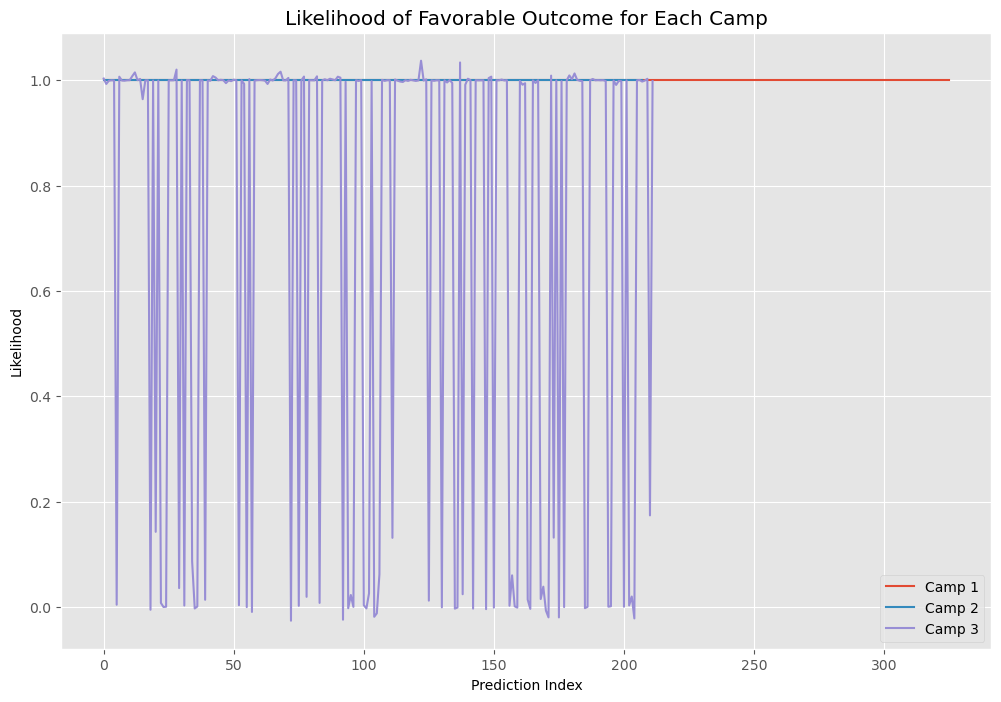

In [299]:
import matplotlib.pyplot as plt

# Camp labels
camp_labels = ['Camp 1', 'Camp 2', 'Camp 3']

# Likelihood predictions for each camp
predictions = [predictions_1, predictions_2, predictions_3]

# Plotting
fig, ax = plt.subplots()

for i, camp_prediction in enumerate(predictions):
    ax.plot(camp_prediction, label=f'Camp {i+1}')

ax.set_xlabel('Prediction Index')
ax.set_ylabel('Likelihood')
ax.set_title('Likelihood of Favorable Outcome for Each Camp')
ax.legend()
plt.show()


Camp 1 and Camp 2 predictions are very consistent and almost perfect. Camp 3 has sharp variability in likelihood. 

In [300]:
# Calculate the likelihood of a favorable outcome for camp 1
camp_1_likelihood = (sum(predictions_1) / len(predictions_1)) * 100

# Calculate the likelihood of a favorable outcome for camp 2
camp_2_likelihood = (sum(predictions_2) / len(predictions_2)) * 100

# Calculate the likelihood of a favorable outcome for camp 3
camp_3_likelihood = (sum(predictions_3) / len(predictions_3)) * 100

# Print the likelihood of a favorable outcome for each camp
print("Likelihood of predicting Favorable Outcome for Camp 1: {:.5f}%".format(camp_1_likelihood))
print("Likelihood of predicting Favorable Outcome for Camp 2: {:.5f}%".format(camp_2_likelihood))
print("Likelihood of predicting Favorable Outcome for Camp 3: {:.5f}%".format(camp_3_likelihood))


Likelihood of predicting Favorable Outcome for Camp 1: 99.97195%
Likelihood of predicting Favorable Outcome for Camp 2: 99.99912%
Likelihood of predicting Favorable Outcome for Camp 3: 72.16944%


This shows that the model is accurate at predicting favoriable outcomes within 99.9% for Health Camp 1 and Health Camp 2, but Health Camp 3 is accurate within 72%. This may be able to be improved upon with further tuning if needed. 

Compare the model's predictions to actual outcomes and calculate evaluation metrics. 

In [301]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert predictions to binary values for camp 1
binary_predictions_1 = [1 if p >= 0.5 else 0 for p in predictions_1]

# Calculate accuracy for camp 1
accuracy_1 = accuracy_score(y1_test_clean, binary_predictions_1)

# Calculate precision for camp 1
precision_1 = precision_score(y1_test_clean, binary_predictions_1)

# Calculate recall for camp 1
recall_1 = recall_score(y1_test_clean, binary_predictions_1)

# Calculate F1 score for camp 1
f1_1 = f1_score(y1_test_clean, binary_predictions_1)

# Print evaluation metrics for camp 1
print("Evaluation metrics for Camp 1:")
print("Accuracy:", accuracy_1)
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1 Score:", f1_1)


Evaluation metrics for Camp 1:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [302]:
# Convert predictions to binary values for camp 2
binary_predictions_2 = [1 if p >= 0.5 else 0 for p in predictions_2]

# Calculate accuracy for camp 2
accuracy_2 = accuracy_score(y2_test_clean, binary_predictions_2)

# Calculate precision for camp 2
precision_2 = precision_score(y2_test_clean, binary_predictions_2)

# Calculate recall for camp 2
recall_2 = recall_score(y2_test_clean, binary_predictions_2)

# Calculate F1 score for camp 2
f1_2 = f1_score(y2_test_clean, binary_predictions_2)

# Print evaluation metrics for camp 2
print("Evaluation metrics for Camp 2:")
print("Accuracy:", accuracy_2)
print("Precision:", precision_2)
print("Recall:", recall_2)
print("F1 Score:", f1_2)

Evaluation metrics for Camp 2:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [303]:
# Convert predictions to binary values for camp 3
binary_predictions_3 = [1 if p >= 0.5 else 0 for p in predictions_3]

# Calculate accuracy for camp 3
accuracy_3 = accuracy_score(y3_test_clean, binary_predictions_3)

# Calculate precision for camp 3
precision_3 = precision_score(y3_test_clean, binary_predictions_3)

# Calculate recall for camp 3
recall_3 = recall_score(y3_test_clean, binary_predictions_3)

# Calculate F1 score for camp 3
f1_3 = f1_score(y3_test_clean, binary_predictions_3)

# Print evaluation metrics for camp 3
print("Evaluation metrics for Camp 3:")
print("Accuracy:", accuracy_3)
print("Precision:", precision_3)
print("Recall:", recall_3)
print("F1 Score:", f1_3)

Evaluation metrics for Camp 3:
Accuracy: 0.9952830188679245
Precision: 1.0
Recall: 0.9934640522875817
F1 Score: 0.9967213114754099


The model worked perfectly with Camp 1 and Camp 2 predictions when compared to actual values. Camp 3 actually performed wihtin 99%. From the visualization, 72% of the predictions are 99%, but the remaining 28% are radically off. 

## In Conclusion

Let's evaluate the 4 questions we asked during our EDA: 

1. What is the average duration of different camp types (Category1) and how does it impact participant attendance and engagement?
The third camp type has a different engagement metric than the first two, but it shows the largest engagement and second highest attendance and longest average duration. 

2. What is the drop-off rate between the "Registration" stage and the number of people actually participating in the medical camps?
There doesn't seem to be a large difference in attendance between the Health Camp types, but of the people who sign up an average of 13.3% of people actually attend and 86.7% drop off. 

3. Can we identify any patterns or factors that contribute to the drop-off in participation?
Category2 has 7 variables, and the A, F and G variables have the strongest correlation to the Attended_Camp column. Also, Income_1 and Income_2 and Var5 have stronger correlations. The meanings of those variables are anonymous to me, but I would advise looking deeper into those.

4. Can we predict the likelihood of a participant having a favorable outcome (e.g., obtaining a health score or visiting at least one stall) based on the available data?
This shows that the model is accurate at predicting favoriable outcomes within 99.9% for Health Camp 1 and Health Camp 2, but Health Camp 3 is accurate within 72%. This may be able to be improved upon with further tuning if needed.
